In [3]:
import numpy as np
import dill
import importlib
import sys
import os
import matplotlib.pyplot as plt

In [4]:
from plot_functions import *
from Subject_Object import *
sys.path.insert(0, r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Modeling Scripts\\') 
import Optimal_Stopping_Object_v2
importlib.reload(Optimal_Stopping_Object_v2) # Reloads so I don't have to restart kernel if I change a function in the Object of another py file
from Optimal_Stopping_Object_v2 import *

# Initial Thangs

In [5]:
plt.style.use('cashaback_dark')
wheel = dv.ColorWheel()

# Initial thangs
os.chdir('D:\\Subject_Data\\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
SAVE_PATH = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Group_Figures\Exp1\\'
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# Fields pull and pull list
os.chdir('D:\Subject_Data\Seth_MatchPennies_Agent_Exp1')
PATH = os.getcwd()
figures_pull_list = []
figures_pull_list_control = []
figures_pull_list_task = []
fields_pull = []
with open(PATH+"\\Figures_Pull_List.txt", "r") as pull_file:
    figures_pull_list = pull_file.read().splitlines()
with open(PATH+"\\Fields_Pull.txt", "r") as fields_pull:
    fields_pull = fields_pull.read().splitlines()
num_subjects = len(figures_pull_list)
task_name = 'Seth_MatchPennies_Agent_Exp1'
num_subjects

16

In [6]:
tp3_title = "1000 (50)"
tp4_title = "1000 (150)"
tp5_title = '1100 (50)'
tp6_title = "1100 (150)"
tp7_title = "1200 (50)"
tp8_title = '1200 (150)'
trial_block_titles = [tp3_title, tp4_title, tp5_title,tp6_title, tp7_title, tp8_title]
num_blocks = len(trial_block_titles)

## Pickle Objects

In [7]:
load_path = r'D:\Subject_Data\Seth_MatchPennies_Agent_Exp1\Subjects_Analyzed\\'
subject = dill.load((open(load_path + 'subject_object_dict.pkl', 'rb')))
group = dill.load((open(load_path + 'group_object.pkl', 'rb')))

# Pickle Numerical Model to Get Same Parameters

In [8]:
if 'group_simulation' not in locals():
    load_path = r'C:\Users\Seth Sullivan\OneDrive - University of Delaware - o365\Desktop\MatchPennies-Agent-Expirement\Model Objects\Simulation_Objects\\'
    group_simulation = dill.load((open(load_path + 'group_sim_experiment_results.pkl', 'rb')))

# Create Model

In [9]:
group_simulation.decision_to_action_delay_mean

80

In [10]:
group_model = Optimal_Decision_Time_Model(reaction_time = group_simulation.reaction_time_mean, movement_time = group_simulation.movement_time_mean, incorrect_cost = 0,
                                          reaction_uncertainty = group_simulation.reaction_uncertainty, movement_uncertainty = group_simulation.movement_uncertainty,
                                          timing_uncertainty = group_simulation.timing_uncertainty,
                                          decision_action_delay_uncertainty = group_simulation.decision_to_action_delay_uncertainty, decision_action_delay_mean = group_simulation.decision_to_action_delay_mean,
                                         )

(6, 2000)


## Set Save to True or False

In [11]:
save = True

# Plots

### Indecisions

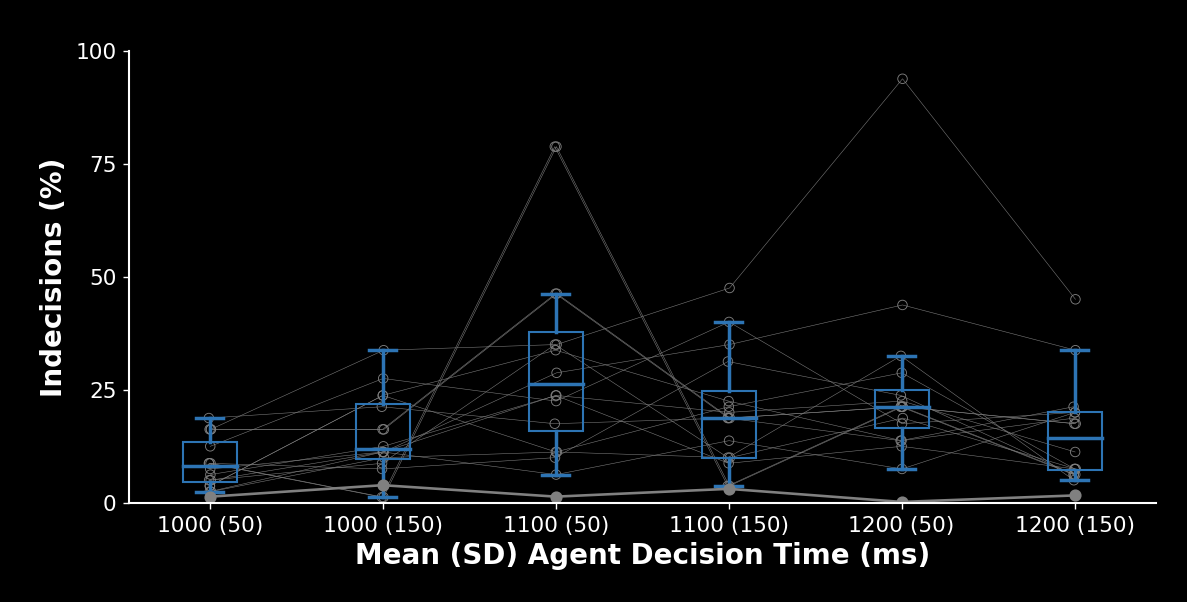

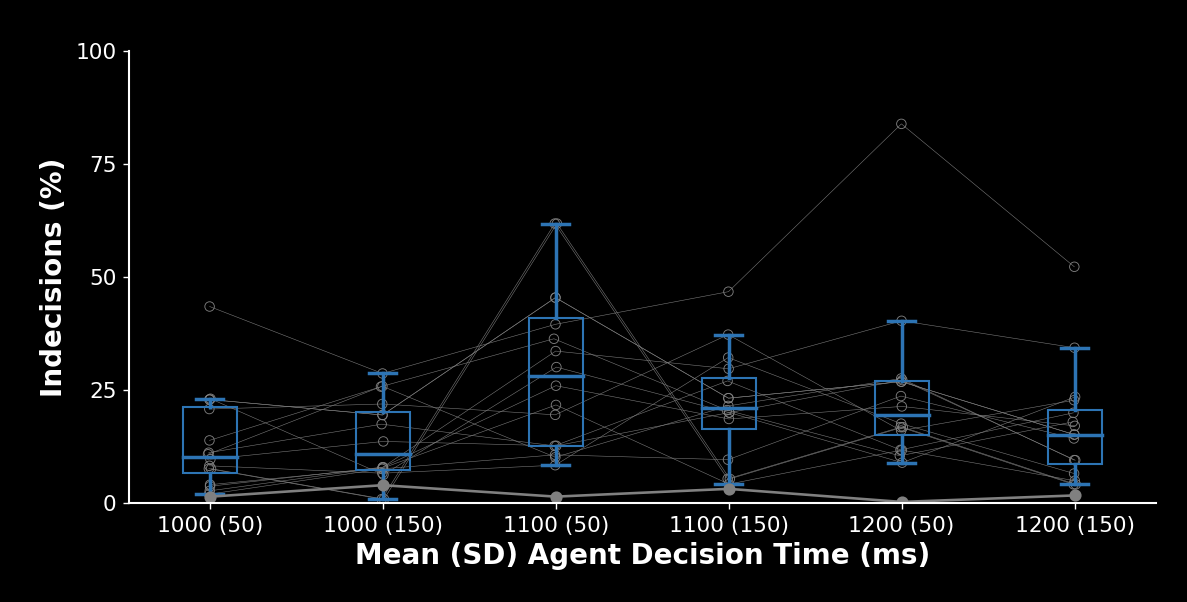

In [17]:
metric = group.combine_all_subjects('player_perc_indecisions') 
optimal_metric = group_model.prob_indecision*100

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
plt.show()


# PROBABILISTIC BASED ON LEAVE TIME
# movement_time_tiled = np.tile(group.combine_all_subjects('reaction_movement_time_mean'),(6,1)).T
# uncertainty_tiled = np.tile(group.combine_all_subjects('interval_reach_time_sd'),(6,1)).T
# prob_indecision = (1 - stats.norm.cdf(1500,group.combine_all_subjects('player_task_decision_time_mean')+movement_time_tiled,uncertainty_tiled))*100
# metric = prob_indecision
 
# w,h = 12,6
# axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
# xlocs = np.linspace(0,w,num=len(trial_block_titles))
# ylocs = np.arange(0,125,25)

# bw = 0.75
# multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
# dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)

# ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

# ax.set_xticks(xlocs),ax.set_yticks(ylocs)
# ax.set_xticklabels(trial_block_titles)
# ax.set_ylim(0,100)
# ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
# ax.set_ylabel('Indecisions (%)')
# if save:
#     axmain.set_axis_off()
#     plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
# plt.show()

# Here I'm checking how accurate my model is in calculating the number of indecisions solely based on the mean decision time and some uncertainty
prob_indecision = (1 - stats.norm.cdf(1500,group.combine_all_subjects('player_task_movement_time_mean') + group.combine_all_subjects('player_task_decision_time_mean'),group.combine_all_subjects('gamble_decision_time_sd')))*100
metric = group.combine_all_subjects('player_perc_indecisions') 

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,prob_indecision,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=prob_indecision.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Indecisions (%)')
if save:
    axmain.set_axis_off()
    plt.savefig(SAVE_PATH+'indecisions', dpi = 400, transparent = True)
plt.show()

### Wins

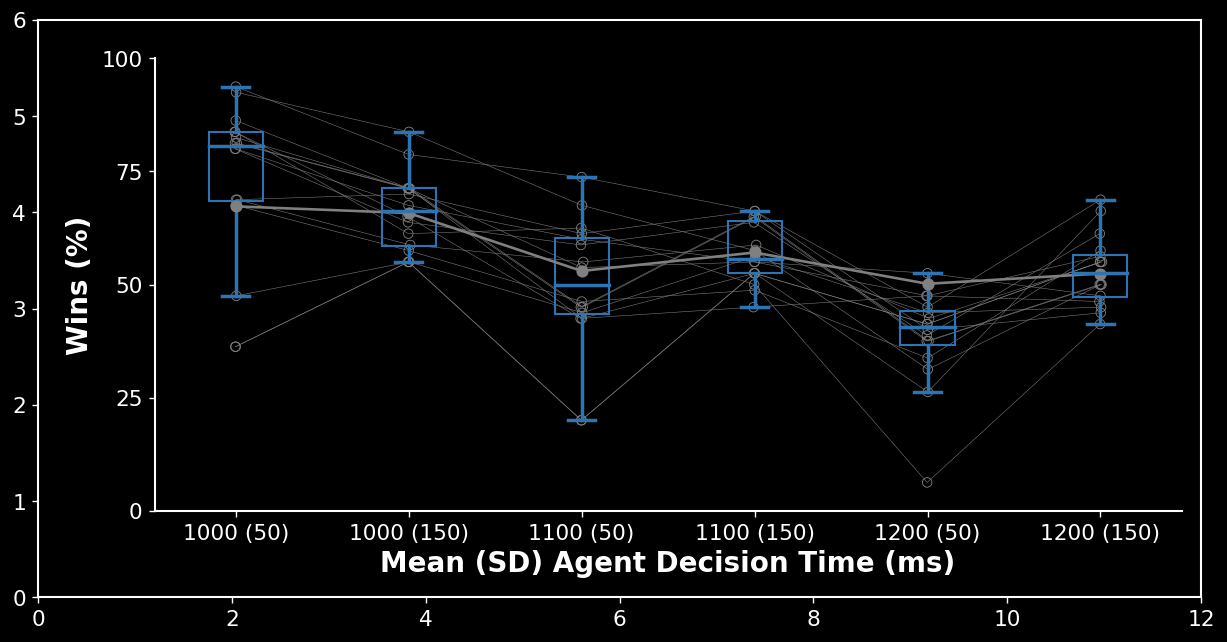

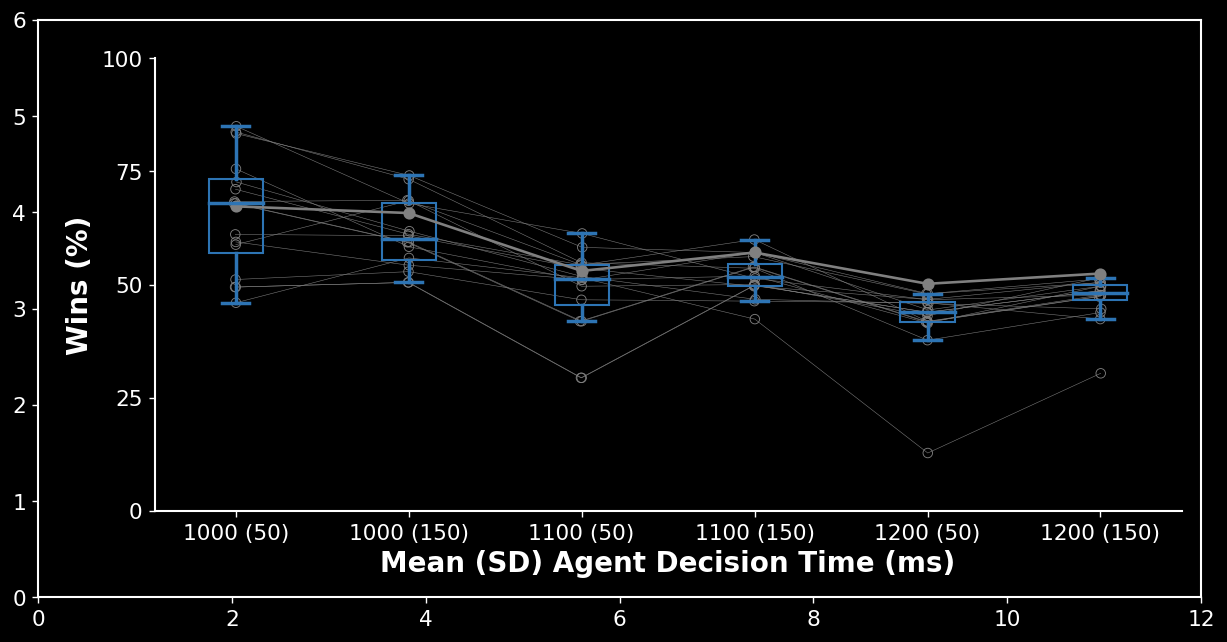

In [18]:
metric = group.combine_all_subjects('player_perc_wins') 
w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)
optimal_metric = group_model.prob_win*100

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')

# Here I'm checking how accurate my model is in calculating the number of wins solely based on the mean decision time and some uncertainty
mean_diff = group.combine_all_subjects('player_minus_agent_task_decision_time_mean')
std_diff = np.sqrt(group.combine_all_subjects('gamble_decision_time_sd')**2 + group.combine_all_subjects('agent_task_decision_time_sd')**2)
reaction_time_tiled = np.tile(group.combine_all_subjects('reaction_time_mean')-80,(6,1)).T

prob_reaction_win = 1 - stats.norm.cdf(reaction_time_tiled,mean_diff,std_diff)
prob_gamble_win = (1 - prob_reaction_win)*0.5
prob_indecision = (1 - stats.norm.cdf(1500,group.combine_all_subjects('player_task_movement_time_mean') + group.combine_all_subjects('player_task_decision_time_mean'),
                                      group.combine_all_subjects('gamble_decision_time_sd')))

prob_win = (prob_reaction_win*(1-prob_indecision) + prob_gamble_win*(1-prob_indecision))*100
metric = prob_win

w,h = 12,6
axmain,ax = make_figure_panel(figsize=(w,h),inset_size=(1.2,0.9,w-1.4,h-1.3))
xlocs = np.linspace(0,w,num=len(trial_block_titles))
ylocs = np.arange(0,125,25)

bw = 0.75
multi_boxplot(ax,metric,xlocs=xlocs,box_width = bw,colors = wheel.seth_blue)
dv.jitter_array(ax=ax,x_positions=xlocs,data_list=metric.T, noise_scale=0.01, include_mean = False, circle_size=30)
ax.plot(xlocs,optimal_metric,c='grey',marker='o')

ax.set_xlim(min(xlocs)-1.5*bw,max(xlocs)+1.5*bw), ax.set_ylim(min(ylocs),max(ylocs))

ax.set_xticks(xlocs),ax.set_yticks(ylocs)
ax.set_xticklabels(trial_block_titles)
ax.set_ylim(0,100)
ax.set_xlabel('Mean (SD) Agent Decision Time (ms)')
ax.set_ylabel('Wins (%)')
plt.show()

In [14]:
prob_reaction_win

array([[0.03872314, 0.00690608, 0.28708432, 0.02062443, 0.04186232,
        0.00491905],
       [0.39584312, 0.32691996, 0.20641895, 0.24701784, 0.06913723,
        0.05068635],
       [0.32909708, 0.31897527, 0.25521688, 0.16400063, 0.08818301,
        0.06277236],
       [0.05571627, 0.12919688, 0.02689735, 0.08390572, 0.00271398,
        0.05612818],
       [0.31632857, 0.43511749, 0.19817456, 0.24843402, 0.03830293,
        0.10566738],
       [0.20333115, 0.20221813, 0.0958838 , 0.3252807 , 0.06693132,
        0.04072048],
       [0.59051508, 0.40462417, 0.33429207, 0.42310193, 0.21455936,
        0.16757654],
       [0.22094093, 0.33706577, 0.2211672 , 0.10846937, 0.04286743,
        0.04530335],
       [0.36299757, 0.41020253, 0.30073594, 0.36480863, 0.14932536,
        0.19680673],
       [0.38285476, 0.4337597 , 0.30343829, 0.26714227, 0.02704616,
        0.12857874],
       [0.19884233, 0.32290846, 0.05714953, 0.19631222, 0.06749203,
        0.04650955],
       [0.52979036, 0

In [15]:
prob_indecision

array([[0.07549917, 0.00828205, 0.617408  , 0.05305271, 0.16740155,
        0.04093676],
       [0.22841922, 0.19426183, 0.45375907, 0.23146542, 0.26792032,
        0.1509474 ],
       [0.23013827, 0.06221413, 0.30015807, 0.19947917, 0.27148944,
        0.09436019],
       [0.09657631, 0.1358182 , 0.12615682, 0.1996285 , 0.08889025,
        0.23423879],
       [0.03684671, 0.07894156, 0.25903245, 0.18549585, 0.21321932,
        0.17022447],
       [0.08193052, 0.06558659, 0.08327033, 0.32120724, 0.17518745,
        0.06487066],
       [0.43406866, 0.2860039 , 0.39473578, 0.46684791, 0.83783453,
        0.52189872],
       [0.04021117, 0.07717201, 0.21653219, 0.04144449, 0.1166691 ,
        0.04888584],
       [0.02661479, 0.07867081, 0.33557309, 0.29643095, 0.40249793,
        0.34295356],
       [0.10737897, 0.25692898, 0.36276949, 0.20499362, 0.10412278,
        0.17897561],
       [0.13809426, 0.25772812, 0.1008761 , 0.21435113, 0.27502206,
        0.0945546 ],
       [0.11093307, 0